In [300]:
%matplotlib inline


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from matplotlib import pyplot

from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier



In [301]:
df_2020 = pd.read_csv("C:/Users/Toomas/Desktop/ITMI_Data/Cleaned_datasets_25_64/Yearly/2020_cleaned_weights.csv")

In [302]:
# drop irrelevant columns from the analysis
df_2020 = df_2020.drop(columns=['survey_year', 'respondent_id', 'age','bmi','bmi_four_groups','bmi_two_groups_split25', 'weights'])

In [303]:
# create dummy variables
# first change values from numeric to nominal for readable dummy labels

df_2020['gender'] = df_2020['gender'].replace([1,2],['MALE','FEMALE'])
df_2020['age_group'] = df_2020['age_group'].replace([1,2,3,4],['25_34','35_44','45_54','55_64'])
df_2020['ethnicity_estonian_nonestonian'] = df_2020['ethnicity_estonian_nonestonian'].replace([1,2],['ESTONIAN','NON_ESTONIAN'])
df_2020['education'] = df_2020['education'].replace([1,2,3,4],['PRIMARY_BASIC','SECONARY','SECONDARY_VOCATIONAL','HIGHER'])
df_2020['income_per_household_member'] = df_2020['income_per_household_member'].replace([1,2,3,4],['QUARTILE_1','QUARTILE_2','QUARTILE_3','QUARTILE_4'])
df_2020['chronic_disease'] = df_2020['chronic_disease'].replace([1,2],['YES','NO'])
df_2020['smoking_history'] = df_2020['smoking_history'].replace([1,2,3,4],['NEVER','FORMERLY','SELDOM','DAILY'])
df_2020['alcohol_standard_units_consumption_frequency'] = df_2020['alcohol_standard_units_consumption_frequency'].replace([1,2,3,4,5],['NEVER','<1x_MONTH','1+x_MONTH','1x_WEEK','ALMOST_DAILY'])
df_2020['exercising_frequency'] = df_2020['exercising_frequency'].replace([1,2,3,4,5,6],['NEVER','1x_MONTH','2_3x_MONTH','1x_WEEK','2_3x_WEEK', '4_7X_WEEK'])
df_2020['work_physical_effort_level'] = df_2020['work_physical_effort_level'].replace([1,2,3,4],['LITTLE','SOME','AVERAGE','A_LOT'])


df_dummies = pd.get_dummies(df_2020, columns=['gender', 'age_group', \
                                              'ethnicity_estonian_nonestonian', 'education',\
                                              'income_per_household_member', 'chronic_disease',\
                                              'smoking_history',\
                                              'alcohol_standard_units_consumption_frequency',\
                                              'exercising_frequency',\
                                              'work_physical_effort_level'],drop_first=False)

In [304]:
df_dummies.columns

Index(['bmi_two_groups_split30', 'gender_FEMALE', 'gender_MALE',
       'age_group_25_34', 'age_group_35_44', 'age_group_45_54',
       'age_group_55_64', 'ethnicity_estonian_nonestonian_ESTONIAN',
       'ethnicity_estonian_nonestonian_NON_ESTONIAN', 'education_HIGHER',
       'education_PRIMARY_BASIC', 'education_SECONARY',
       'education_SECONDARY_VOCATIONAL',
       'income_per_household_member_QUARTILE_1',
       'income_per_household_member_QUARTILE_2',
       'income_per_household_member_QUARTILE_3',
       'income_per_household_member_QUARTILE_4', 'chronic_disease_NO',
       'chronic_disease_YES', 'smoking_history_DAILY',
       'smoking_history_FORMERLY', 'smoking_history_NEVER',
       'smoking_history_SELDOM',
       'alcohol_standard_units_consumption_frequency_1+x_MONTH',
       'alcohol_standard_units_consumption_frequency_1x_WEEK',
       'alcohol_standard_units_consumption_frequency_<1x_MONTH',
       'alcohol_standard_units_consumption_frequency_ALMOST_DAILY',
    

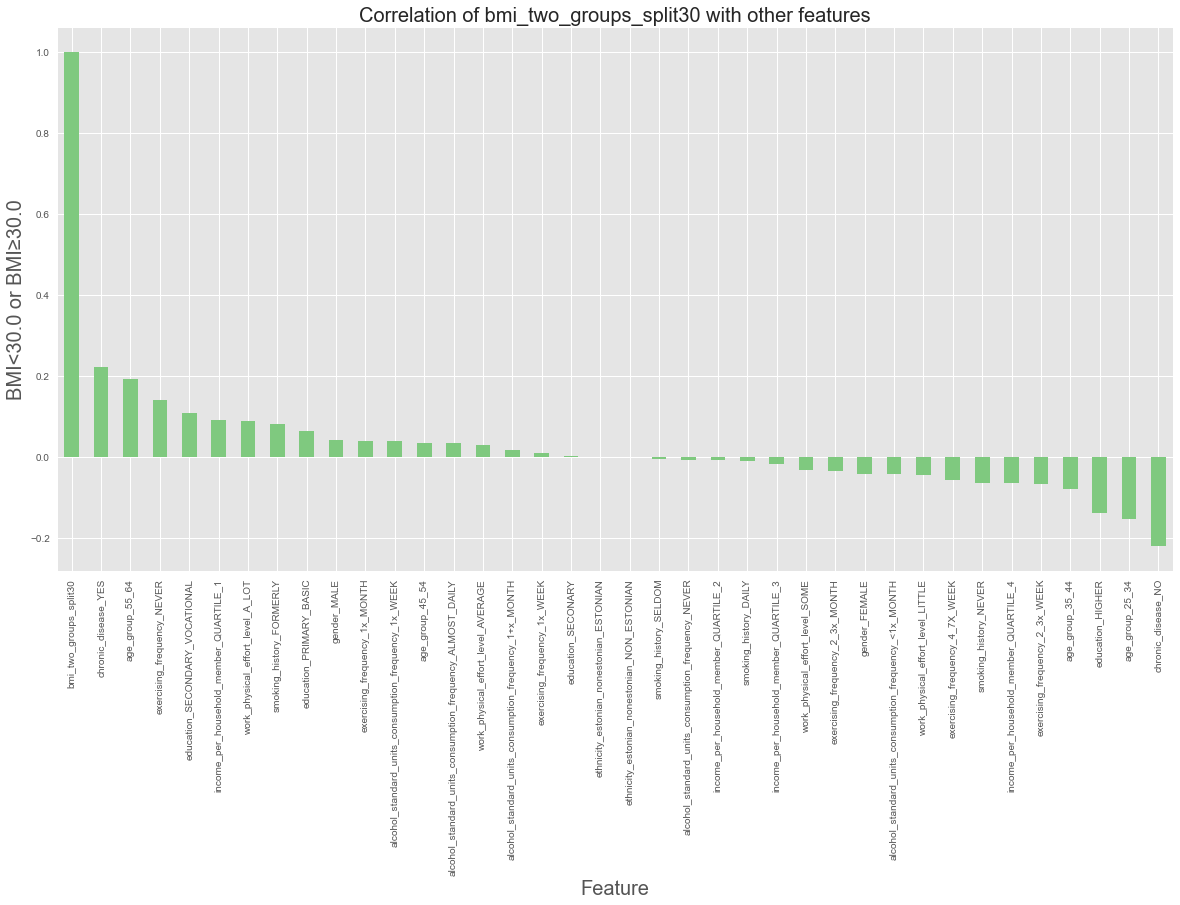

<Figure size 432x288 with 0 Axes>

In [305]:
## correlation graph
plt.style.use('ggplot')
plt.figure(figsize = (20,10))

# get a color map

my_cmap = cm.get_cmap('Accent')

# Get correlation of bmi_two_groups_split30 with other variables

df_dummies.corr()['bmi_two_groups_split30'].sort_values(ascending = False).plot(kind='bar', cmap=my_cmap)

 

plt.title('Correlation of bmi_two_groups_split30 with other features', fontsize=20)
plt.xlabel('Feature', fontsize=20)
plt.ylabel('BMI<30.0 or BMI≥30.0', fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/correlations.pdf")

In [306]:
# scaling all variables to the range of 0 to 1 before data learning process

y = df_dummies['bmi_two_groups_split30'].values
X = df_dummies.drop(columns = ['bmi_two_groups_split30'])

features = X.columns.values
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [307]:
#split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

print("The shape of X_train dataset: ", X_train.shape)
print("The shape of y_train dataset: ", y_train.shape)
print("The shape of X_test dataset: ", X_test.shape)
print("The shape of y_test dataset: ", y_test.shape)

The shape of X_train dataset:  (1389, 37)
The shape of y_train dataset:  (1389,)
The shape of X_test dataset:  (348, 37)
The shape of y_test dataset:  (348,)


In [308]:
# oversample the mintority class

sm = SMOTE(random_state=1)
X_train_res,y_train_res = sm.fit_resample(X_train,y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '2': {}".format(sum(y_train_res==2)))

After OverSampling, the shape of train_X: (2164, 37)
After OverSampling, the shape of train_y: (2164,) 

After OverSampling, counts of label '1': 1082
After OverSampling, counts of label '2': 1082


In [309]:
#========================================================
# 01A Logistic regression model training / original data
#=======================================================

model_LR = LogisticRegression(random_state=1)
model_LR.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [310]:
#print out the hyperparameters of the trained model
model_LR.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 1,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [311]:
# Logistic regression model prediction and metrics (original dataset)
y_pred = model_LR.predict(X_test)

print('LR model metrics:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: \t {0:.2f}'.format(metrics.precision_score(y_test, y_pred)))
print('Recall: \t {0:.2f}'.format(metrics.recall_score(y_test, y_pred)))
print('F1-score: \t {0:.2f}'.format(metrics.f1_score(y_test, y_pred)))

LR model metrics:
Accuracy: 0.79
Precision: 	 0.80
Recall: 	 0.97
F1-score: 	 0.88


In [312]:
# LR model performance with K-folds validation (original dataset)

from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=10, random_state=1, shuffle=True)
model_LR_1 = LogisticRegression(random_state=1)
scores1 = cross_val_score(model_LR_1, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
scores2 = cross_val_score(model_LR_1, X, y, scoring='precision', cv=cv, n_jobs=-1)
scores3 = cross_val_score(model_LR_1, X, y, scoring='recall', cv=cv, n_jobs=-1)
scores4 = cross_val_score(model_LR_1, X, y, scoring='f1', cv=cv, n_jobs=-1)
print('Accuracy: %.2f' % (mean(scores1)))
print('Precision: %.2f' % (mean(scores2)))
print('Recall: %.2f' % (mean(scores3)))
print('F1 Score: %.2f' % (mean(scores4)))

Accuracy: 0.78
Precision: 0.80
Recall: 0.97
F1 Score: 0.87


Feature: 0, Score: 0.05647
Feature: 1, Score: -0.05663
Feature: 2, Score: -0.67162
Feature: 3, Score: -0.19115
Feature: 4, Score: 0.18722
Feature: 5, Score: 0.67539
Feature: 6, Score: 0.04495
Feature: 7, Score: -0.04511
Feature: 8, Score: -0.35134
Feature: 9, Score: 0.32862
Feature: 10, Score: -0.20709
Feature: 11, Score: 0.22965
Feature: 12, Score: 0.11679
Feature: 13, Score: -0.11287
Feature: 14, Score: 0.02815
Feature: 15, Score: -0.03223
Feature: 16, Score: -0.40245
Feature: 17, Score: 0.40229
Feature: 18, Score: -0.45306
Feature: 19, Score: 0.37409
Feature: 20, Score: -0.05274
Feature: 21, Score: 0.13156
Feature: 22, Score: 0.11241
Feature: 23, Score: 0.13248
Feature: 24, Score: 0.09700
Feature: 25, Score: -0.04757
Feature: 26, Score: -0.29448
Feature: 27, Score: 0.22750
Feature: 28, Score: 0.16130
Feature: 29, Score: -0.07432
Feature: 30, Score: -0.11055
Feature: 31, Score: -0.43975
Feature: 32, Score: 0.23566
Feature: 33, Score: -0.04577
Feature: 34, Score: 0.18846
Feature: 35, 

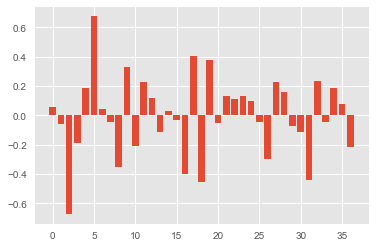

In [313]:
# get importance of features in LR model (original dataset)
importance = model_LR.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

AxesSubplot(0.125,0.125;0.775x0.755)


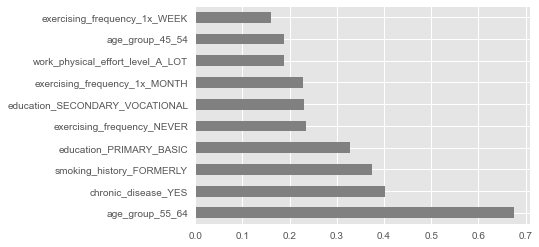

In [314]:
# getting the weights of 10 most important features with association BMI≥30.0 in LR model (original dataset)

weights = pd.Series(model_LR.coef_[0], index = X.columns.values)
print(weights.sort_values(ascending=False)[:10].plot(kind='barh', color='grey'))
#plt.tight_layout()
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/LR_features_most_BMI30.pdf", bbox_inches='tight')

AxesSubplot(0.125,0.125;0.775x0.755)


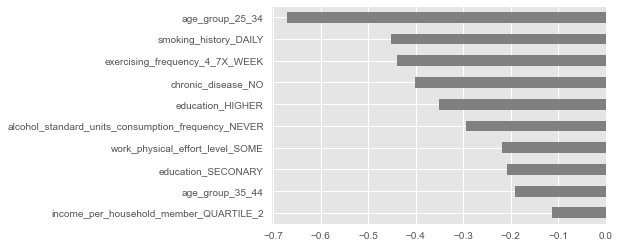

In [315]:
# getting the weights of 10 most important features with inverse association with BMI≥30.0 in LR model (original dataset)
print(weights.sort_values(ascending=False)[-10:].plot(kind='barh', color='grey'))
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/LR_features_least_BMI30.pdf", bbox_inches='tight')

In [316]:
# roc curve for LR model (original dataset)

pred_prob1 = model_LR.predict_proba(X_test)
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [317]:
# computing auc score for LR (original dataset)
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
print(auc_score1)

0.6963626779124934


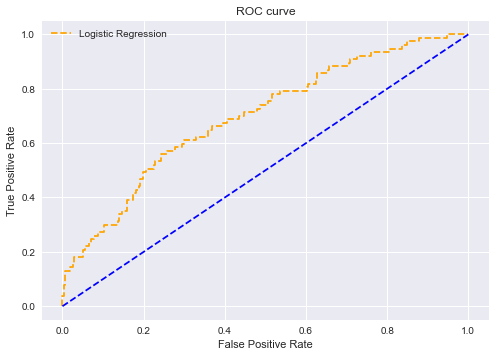

In [318]:
# plot the roc curve for LR (original dataset)

plt.style.use('seaborn')


plt.plot(tpr1, fpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/ROC_curve_LR_BMI30.pdf")
plt.show();

In [319]:
#====================================================
# 01B Logistic regression model training / oversampled data
#====================================================

model_LR_res = LogisticRegression(random_state=1)
model_LR_res.fit(X_train_res, y_train_res)

LogisticRegression(random_state=1)

In [321]:

# Logistic regression model prediction and metrics (oversampled data)
y_pred = model_LR_res.predict(X_test)

print('LR model metrics:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: \t {0:.2f}'.format(metrics.precision_score(y_test, y_pred)))
print('Recall: \t {0:.2f}'.format(metrics.recall_score(y_test, y_pred)))
print('F1-score: \t {0:.2f}'.format(metrics.f1_score(y_test, y_pred)))

LR model metrics:
Accuracy: 0.66
Precision: 	 0.87
Recall: 	 0.67
F1-score: 	 0.76


In [322]:
# LR model performance with K-folds validation (oversampled data)

from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#oversamplling the whole dataset (not just training data)
sm_all = SMOTE(random_state=1)
X_res,y_res = sm_all.fit_resample(X,y)

cv = KFold(n_splits=10, random_state=1, shuffle=True)
model_LR_1_res = LogisticRegression(random_state=1)
scores1 = cross_val_score(model_LR_1_res, X_res, y_res, scoring='accuracy', cv=cv, n_jobs=-1)
scores2 = cross_val_score(model_LR_1_res, X_res, y_res, scoring='precision', cv=cv, n_jobs=-1)
scores3 = cross_val_score(model_LR_1_res, X_res, y_res, scoring='recall', cv=cv, n_jobs=-1)
scores4 = cross_val_score(model_LR_1_res, X_res, y_res, scoring='f1', cv=cv, n_jobs=-1)
scores5 = cross_val_score(model_LR_1_res, X_res, y_res, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Accuracy: %.2f' % (mean(scores1)))
print('Precision: %.2f' % (mean(scores2)))
print('Recall: %.2f' % (mean(scores3)))
print('F1 Score: %.2f' % (mean(scores4)))
print('AUC Score: %.2f' % (mean(scores5)))

Accuracy: 0.68
Precision: 0.68
Recall: 0.67
F1 Score: 0.67
AUC Score: 0.73


Feature: 0, Score: 0.07885
Feature: 1, Score: -0.09353
Feature: 2, Score: -0.72763
Feature: 3, Score: -0.16761
Feature: 4, Score: 0.17395
Feature: 5, Score: 0.70661
Feature: 6, Score: 0.05110
Feature: 7, Score: -0.06578
Feature: 8, Score: -0.38483
Feature: 9, Score: 0.49060
Feature: 10, Score: -0.34298
Feature: 11, Score: 0.22252
Feature: 12, Score: 0.13359
Feature: 13, Score: -0.12529
Feature: 14, Score: 0.01270
Feature: 15, Score: -0.03569
Feature: 16, Score: -0.45949
Feature: 17, Score: 0.44481
Feature: 18, Score: -0.38821
Feature: 19, Score: 0.41781
Feature: 20, Score: 0.07448
Feature: 21, Score: -0.11877
Feature: 22, Score: -0.06762
Feature: 23, Score: 0.08887
Feature: 24, Score: 0.09105
Feature: 25, Score: 0.18205
Feature: 26, Score: -0.30904
Feature: 27, Score: 0.25743
Feature: 28, Score: 0.17048
Feature: 29, Score: 0.12729
Feature: 30, Score: -0.09029
Feature: 31, Score: -0.53013
Feature: 32, Score: 0.05053
Feature: 33, Score: 0.01941
Feature: 34, Score: 0.16629
Feature: 35, Sc

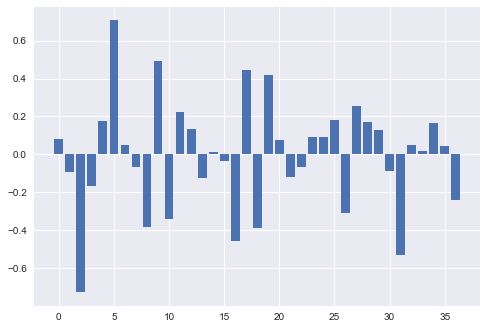

In [323]:
# get importance of features in LR model (oversampled dataset)
importance = model_LR_res.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

AxesSubplot(0.125,0.125;0.775x0.755)


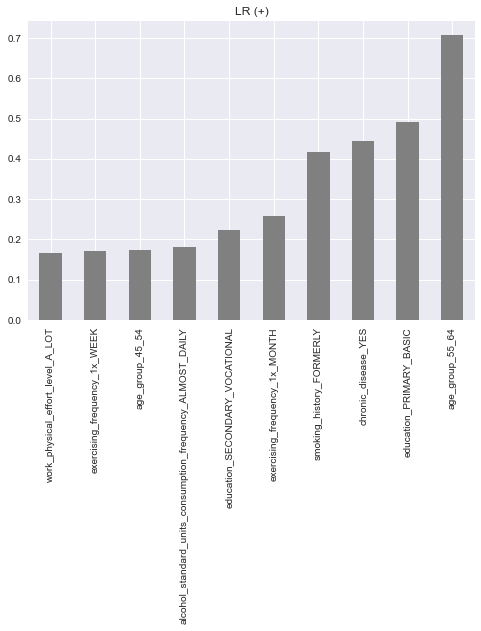

In [324]:
# getting the weights of 10 most important features with association BMI≥30.0 in LR model (oversampled data)

weights = pd.Series(model_LR_res.coef_[0], index = X.columns.values)
print(weights.sort_values(ascending=True)[-10:].plot(kind='bar', color='grey'))
plt.title('LR (+)')
#plt.tight_layout()
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/LR_features_most_BMI30_res.pdf", bbox_inches='tight')

AxesSubplot(0.125,0.125;0.775x0.755)


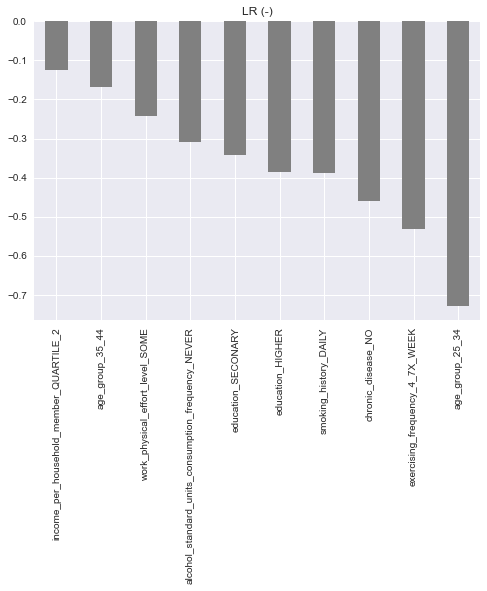

In [325]:
# getting the weights of 10 most important features with inverse association BMI≥30.0 in LR model (oversampled dataset)
print(weights.sort_values(ascending=False)[-10:].plot(kind='bar', color='grey'))
plt.title('LR (-)')
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/LR_features_least_BMI30_res.pdf", bbox_inches='tight')

In [326]:
# roc curve for LR model (oversampled data)

pred_prob1 = model_LR_res.predict_proba(X_test)
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [327]:
# computing auc score for LR (oversampled data)
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
print(auc_score1)


0.6969377485982652


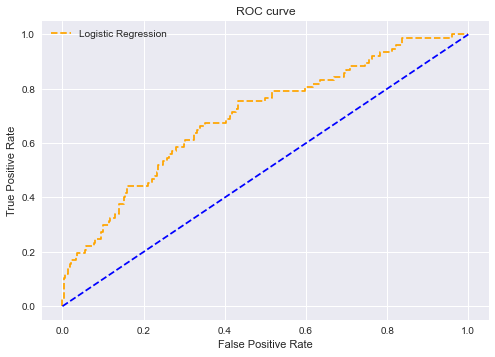

In [328]:
# plot the roc curve for LR (oversampled data)

plt.style.use('seaborn')


plt.plot(tpr1, fpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/ROC_curve_LR_BMI30_res.pdf")
plt.show();

In [329]:
#====================================
# 02A Random Forest model training
#====================================

model_RF = RandomForestClassifier(random_state=1)

model_RF.fit(X_train, y_train)


RandomForestClassifier(random_state=1)

In [330]:
#print out the hyperparameters of the trained model (original data)
model_RF.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [331]:
# Random forest model prediction and metrics (original data)

y_pred = model_RF.predict(X_test)

print('RF model metrics:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: \t {0:.2f}'.format(metrics.precision_score(y_test, y_pred)))
print('Recall: \t {0:.2f}'.format(metrics.recall_score(y_test, y_pred)))
print('F1-score: \t {0:.2f}'.format(metrics.f1_score(y_test, y_pred)))

RF model metrics:
Accuracy: 0.78
Precision: 	 0.81
Recall: 	 0.95
F1-score: 	 0.87


In [332]:
# RF model performance with K-folds validation (original data)

from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=10, random_state=1, shuffle=True)
model_RF_1 = RandomForestClassifier(random_state=1)
scores1 = cross_val_score(model_RF_1, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
scores2 = cross_val_score(model_RF_1, X, y, scoring='precision', cv=cv, n_jobs=-1)
scores3 = cross_val_score(model_RF_1, X, y, scoring='recall', cv=cv, n_jobs=-1)
scores4 = cross_val_score(model_RF_1, X, y, scoring='f1', cv=cv, n_jobs=-1)
print('Accuracy: %.2f' % (mean(scores1)))
print('Precision: %.2f' % (mean(scores2)))
print('Recall: %.2f' % (mean(scores3)))
print('F1 Score: %.2f' % (mean(scores4)))

Accuracy: 0.78
Precision: 0.80
Recall: 0.95
F1 Score: 0.87


Feature: 0, Score: 0.02583
Feature: 1, Score: 0.02735
Feature: 2, Score: 0.02176
Feature: 3, Score: 0.02889
Feature: 4, Score: 0.02772
Feature: 5, Score: 0.04074
Feature: 6, Score: 0.02635
Feature: 7, Score: 0.02553
Feature: 8, Score: 0.02778
Feature: 9, Score: 0.02496
Feature: 10, Score: 0.02156
Feature: 11, Score: 0.03012
Feature: 12, Score: 0.03075
Feature: 13, Score: 0.03640
Feature: 14, Score: 0.02949
Feature: 15, Score: 0.02801
Feature: 16, Score: 0.02807
Feature: 17, Score: 0.02717
Feature: 18, Score: 0.02193
Feature: 19, Score: 0.03239
Feature: 20, Score: 0.02887
Feature: 21, Score: 0.01100
Feature: 22, Score: 0.01860
Feature: 23, Score: 0.01959
Feature: 24, Score: 0.02913
Feature: 25, Score: 0.01321
Feature: 26, Score: 0.03148
Feature: 27, Score: 0.03357
Feature: 28, Score: 0.02921
Feature: 29, Score: 0.01812
Feature: 30, Score: 0.03124
Feature: 31, Score: 0.03156
Feature: 32, Score: 0.02382
Feature: 33, Score: 0.03368
Feature: 34, Score: 0.01979
Feature: 35, Score: 0.03550
Fe

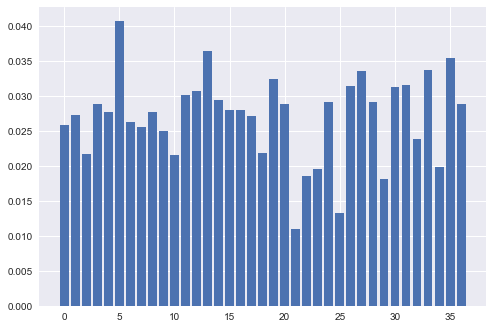

In [333]:
# calculation of RF model feature importance (original data)

importance = model_RF.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

AxesSubplot(0.125,0.125;0.775x0.755)


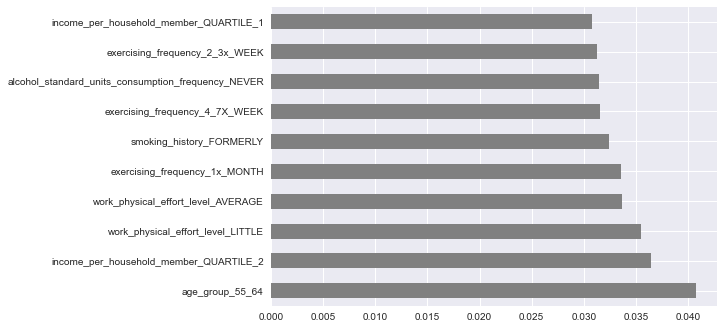

In [334]:
# 10 most important features/ BMI≥30.0 in RF model (original data)

weights = pd.Series(model_RF.feature_importances_, index = X.columns.values)
print(weights.sort_values(ascending=False)[:10].plot(kind='barh', color='grey'))
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/RF_features_most_BMI30.pdf", bbox_inches='tight')

AxesSubplot(0.125,0.125;0.775x0.755)


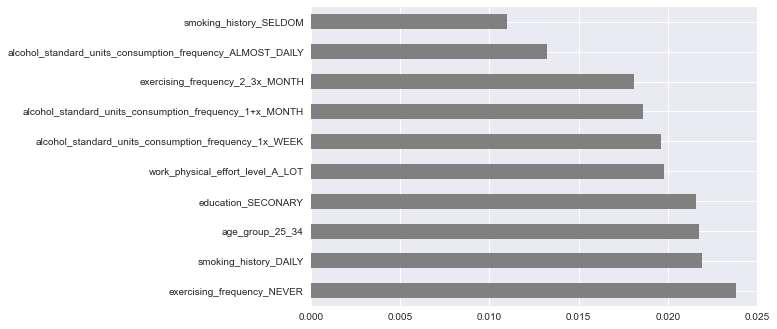

In [335]:
# 10 least important features/ BMI≥30.0 in RF model (original data)
print(weights.sort_values(ascending=False)[-10:].plot(kind='barh', color='grey'))
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/RF_features_least_BMI30.pdf", bbox_inches='tight')

In [336]:
# roc curve for RF model (original data)

pred_prob2 = model_RF.predict_proba(X_test)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [337]:
# computing auc score for RF model (original data)
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
print(auc_score2)

0.6510279388508171


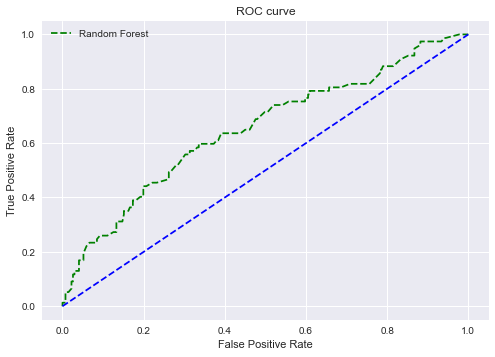

In [338]:
# plot roc curve for RF model (original data)

plt.style.use('seaborn')


plt.plot(tpr2, fpr2, linestyle='--',color='green', label='Random Forest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/ROC_curve_RF_BMI30.pdf")
plt.show();

In [339]:
#===================================================
# 02B Random Forest model training (oversampled data)
#===================================================

model_RF_res = RandomForestClassifier(random_state=1)
model_RF_res.fit(X_train_res, y_train_res)

RandomForestClassifier(random_state=1)

In [342]:
# Random forest model prediction and metrics (oversampled data)

y_pred = model_RF_res.predict(X_test)

print('RF model metrics:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: \t {0:.2f}'.format(metrics.precision_score(y_test, y_pred)))
print('Recall: \t {0:.2f}'.format(metrics.recall_score(y_test, y_pred)))
print('F1-score: \t {0:.2f}'.format(metrics.f1_score(y_test, y_pred)))

RF model metrics:
Accuracy: 0.74
Precision: 	 0.80
Recall: 	 0.89
F1-score: 	 0.84


In [343]:
# RF model performance with K-folds validation (oversampled data)

from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#oversamplling the whole dataset (not just training data)
sm_all = SMOTE(random_state=1)
X_res,y_res = sm_all.fit_resample(X,y)

cv = KFold(n_splits=10, random_state=1, shuffle=True)
model_RF_1_res = RandomForestClassifier(random_state=1)
scores1 = cross_val_score(model_RF_1_res, X_res, y_res, scoring='accuracy', cv=cv, n_jobs=-1)
scores2 = cross_val_score(model_RF_1_res, X_res, y_res, scoring='precision', cv=cv, n_jobs=-1)
scores3 = cross_val_score(model_RF_1_res, X_res, y_res, scoring='recall', cv=cv, n_jobs=-1)
scores4 = cross_val_score(model_RF_1_res, X_res, y_res, scoring='f1', cv=cv, n_jobs=-1)
scores5 = cross_val_score(model_RF_1_res, X_res, y_res, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Accuracy: %.2f' % (mean(scores1)))
print('Precision: %.2f' % (mean(scores2)))
print('Recall: %.2f' % (mean(scores3)))
print('F1 Score: %.2f' % (mean(scores4)))
print('AUC Score: %.2f' % (mean(scores5)))

Accuracy: 0.86
Precision: 0.83
Recall: 0.91
F1 Score: 0.87
AUC Score: 0.93


Feature: 0, Score: 0.02217
Feature: 1, Score: 0.02076
Feature: 2, Score: 0.03849
Feature: 3, Score: 0.03352
Feature: 4, Score: 0.02629
Feature: 5, Score: 0.05341
Feature: 6, Score: 0.02119
Feature: 7, Score: 0.02207
Feature: 8, Score: 0.03472
Feature: 9, Score: 0.03189
Feature: 10, Score: 0.02321
Feature: 11, Score: 0.03250
Feature: 12, Score: 0.02526
Feature: 13, Score: 0.02980
Feature: 14, Score: 0.02598
Feature: 15, Score: 0.02604
Feature: 16, Score: 0.05214
Feature: 17, Score: 0.04552
Feature: 18, Score: 0.02058
Feature: 19, Score: 0.03324
Feature: 20, Score: 0.02650
Feature: 21, Score: 0.00844
Feature: 22, Score: 0.01291
Feature: 23, Score: 0.01610
Feature: 24, Score: 0.02240
Feature: 25, Score: 0.01187
Feature: 26, Score: 0.02619
Feature: 27, Score: 0.03132
Feature: 28, Score: 0.02515
Feature: 29, Score: 0.01934
Feature: 30, Score: 0.03259
Feature: 31, Score: 0.03540
Feature: 32, Score: 0.01853
Feature: 33, Score: 0.02421
Feature: 34, Score: 0.01374
Feature: 35, Score: 0.02927
Fe

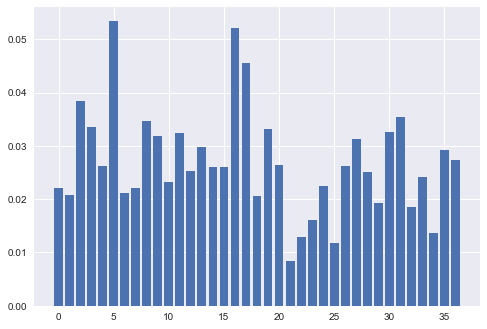

In [344]:
# calculation of RF model feature importance (oversampled data)

importance = model_RF_res.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()


AxesSubplot(0.125,0.125;0.775x0.755)


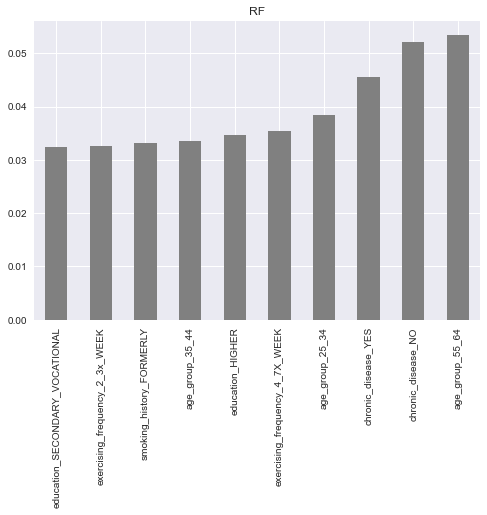

In [345]:
# 10 most important features/ BMI≥30.0 in RF model (oversampled data)

weights = pd.Series(model_RF_res.feature_importances_, index = X.columns.values)
print(weights.sort_values(ascending=True)[-10:].plot(kind='bar', color='grey'))
plt.title('RF')
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/RF_features_most_BMI30_res.pdf", bbox_inches='tight')

AxesSubplot(0.125,0.125;0.775x0.755)


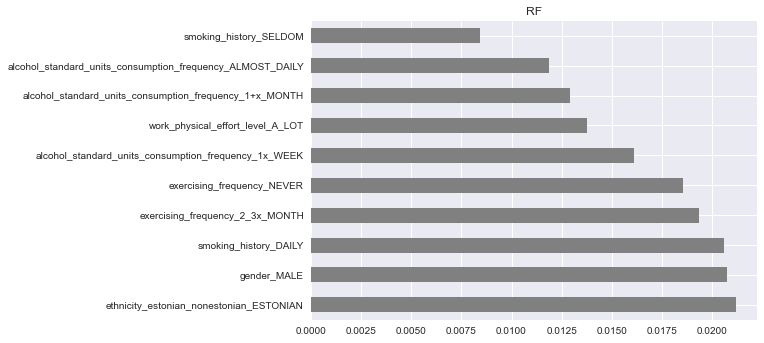

In [346]:
# 10 least important features/ BMI≥30.0 in RF model (oversampled data)
print(weights.sort_values(ascending=False)[-10:].plot(kind='barh', color='grey'))
plt.title('RF')
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/RF_features_least_BMI30_res.pdf", bbox_inches='tight')

In [347]:
# roc curve for RF model (oversampled data)

pred_prob2 = model_RF_res.predict_proba(X_test)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [348]:
# computing auc score for RF model (oversampled data)
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
print(auc_score2)

0.6484640820434179


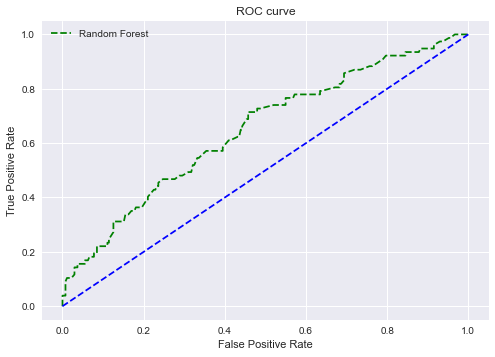

In [349]:
# plot roc curve for RF model (oversampled data)

plt.style.use('seaborn')


plt.plot(tpr2, fpr2, linestyle='--',color='green', label='Random Forest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/ROC_curve_RF_BMI30_res.pdf")
plt.show();

In [351]:
#====================================
# 03A SVM model training (original data)
#====================================

model_SVM=SVC(probability = True, kernel ='linear', random_state=1)
model_SVM.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=1)

In [352]:
#print out the hyperparameters of the trained model (original data)
model_SVM.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': True,
 'random_state': 1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [353]:
# SVM model prediction and metrics (original data)

y_pred = model_SVM.predict(X_test)

print('SVM model metrics:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: \t {0:.2f}'.format(metrics.precision_score(y_test, y_pred)))
print('Recall: \t {0:.2f}'.format(metrics.recall_score(y_test, y_pred)))
print('F1-score: \t {0:.2f}'.format(metrics.f1_score(y_test, y_pred)))


SVM model metrics:
Accuracy: 0.78
Precision: 	 0.78
Recall: 	 1.00
F1-score: 	 0.88


In [355]:
# SVM model performance with K-folds validation (original data)

from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=10, random_state=1, shuffle=True)
model_SVM_1 = SVC(probability = True, kernel ='linear',random_state=1)
scores1 = cross_val_score(model_SVM_1, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
scores2 = cross_val_score(model_SVM_1, X, y, scoring='precision', cv=cv, n_jobs=-1)
scores3 = cross_val_score(model_SVM_1, X, y, scoring='recall', cv=cv, n_jobs=-1)
scores4 = cross_val_score(model_SVM_1, X, y, scoring='f1', cv=cv, n_jobs=-1)
print('Accuracy: %.2f' % (mean(scores1)))
print('Precision: %.2f' % (mean(scores2)))
print('Recall: %.2f' % (mean(scores3)))
print('F1 Score: %.2f' % (mean(scores4)))

Accuracy: 0.78
Precision: 0.78
Recall: 1.00
F1 Score: 0.88


AxesSubplot(0.125,0.125;0.775x0.755)


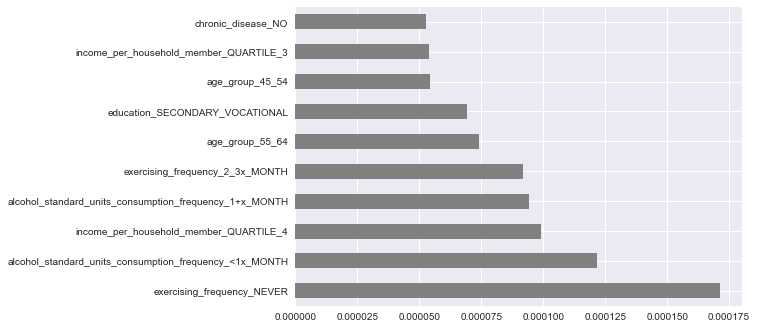

In [356]:
# 10 most important variables affecting BMI≥30.0 in SVM model (original data) 

weights = pd.Series(model_SVM.coef_[0], index = X.columns.values)
print(weights.sort_values(ascending=False)[:10].plot(kind='barh', color='grey'))
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/SVM_features_most_BMI30.pdf", bbox_inches='tight')

AxesSubplot(0.125,0.125;0.775x0.755)


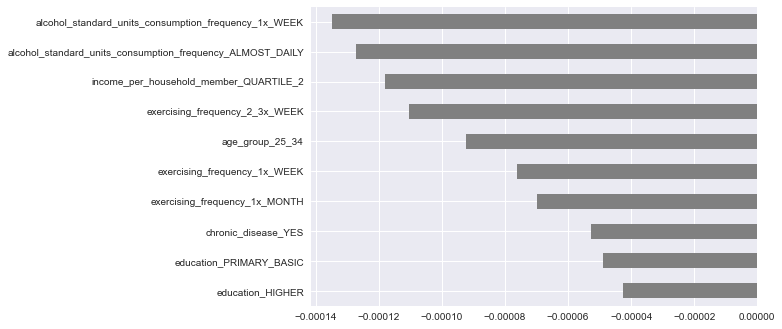

In [357]:
# # 10 least important variables affecting BMI≥30.0 in SVM model (original data) 
print(weights.sort_values(ascending=False)[-10:].plot(kind='barh', color='grey'))
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/SVM_features_least_BMI30.pdf", bbox_inches='tight')

In [358]:
# roc curve for SVM model (original data) 

pred_prob3 = model_SVM.predict_proba(X_test)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [359]:
# computing auc score for SVM (original data) 
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])
print(auc_score3)

0.531844539224613


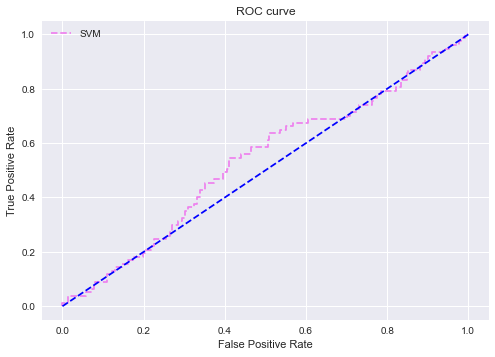

In [360]:
# plot roc curve for SVM model (original data)
plt.style.use('seaborn')


plt.plot(tpr3, fpr3, linestyle='--',color='violet', label='SVM')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/ROC_curve_SVM_BMI30.pdf")
plt.show();

In [361]:
#==========================================
# 03B SVM model training (oversampled data)
#==========================================

model_SVM_res=SVC(probability = True, kernel ='linear', random_state=1)
model_SVM_res.fit(X_train_res, y_train_res)

SVC(kernel='linear', probability=True, random_state=1)

In [362]:
# SVM model prediction and metrics (oversampled data)

y_pred = model_SVM_res.predict(X_test)

print('SVM model metrics:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: \t {0:.2f}'.format(metrics.precision_score(y_test, y_pred)))
print('Recall: \t {0:.2f}'.format(metrics.recall_score(y_test, y_pred)))
print('F1-score: \t {0:.2f}'.format(metrics.f1_score(y_test, y_pred)))

SVM model metrics:
Accuracy: 0.66
Precision: 	 0.88
Recall: 	 0.65
F1-score: 	 0.74


In [363]:
# RF model performance with K-folds validation (oversampled data)


#oversamplling the whole dataset (not just training data)
sm_all = SMOTE(random_state=1)
X_res,y_res = sm_all.fit_resample(X,y)

cv = KFold(n_splits=10, random_state=1, shuffle=True)
model_SVM_1_res = SVC(probability = True, kernel ='linear', random_state=1)
scores1 = cross_val_score(model_SVM_1_res, X_res, y_res, scoring='accuracy', cv=cv, n_jobs=-1)
scores2 = cross_val_score(model_SVM_1_res, X_res, y_res, scoring='precision', cv=cv, n_jobs=-1)
scores3 = cross_val_score(model_SVM_1_res, X_res, y_res, scoring='recall', cv=cv, n_jobs=-1)
scores4 = cross_val_score(model_SVM_1_res, X_res, y_res, scoring='f1', cv=cv, n_jobs=-1)
scores5 = cross_val_score(model_SVM_1_res, X_res, y_res, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Accuracy: %.2f' % (mean(scores1)))
print('Precision: %.2f' % (mean(scores2)))
print('Recall: %.2f' % (mean(scores3)))
print('F1 Score: %.2f' % (mean(scores4)))
print('AUC Score: %.2f' % (mean(scores5)))

Accuracy: 0.66
Precision: 0.67
Recall: 0.64
F1 Score: 0.65
AUC Score: 0.72


AxesSubplot(0.125,0.125;0.775x0.755)


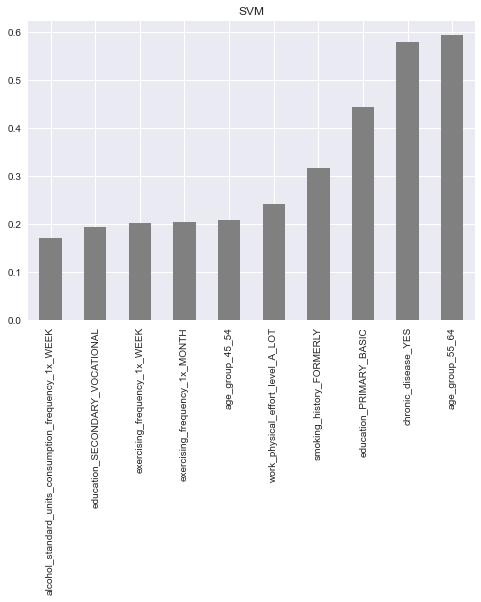

In [364]:
# 10 most important variables affecting BMI≥30.0 in SVM model (oversampled data) 

weights = pd.Series(model_SVM_res.coef_[0], index = X.columns.values)
print(weights.sort_values(ascending=True)[-10:].plot(kind='bar', color='grey'))
plt.title('SVM')
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/SVM_features_most_BMI30_res.pdf", bbox_inches='tight')

AxesSubplot(0.125,0.125;0.775x0.755)


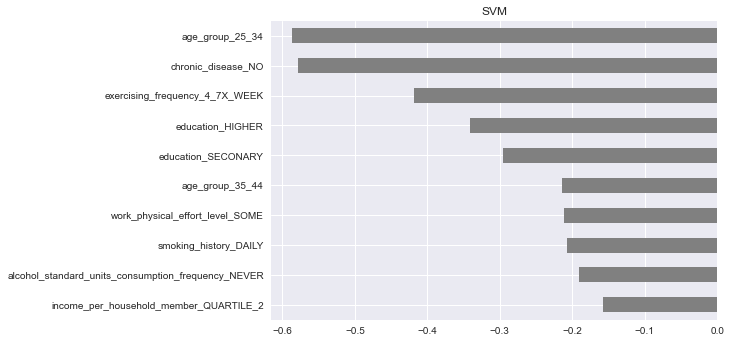

In [365]:
# # 10 least important variables affecting BMI≥30.0 in SVM model (oversampled data) 
print(weights.sort_values(ascending=False)[-10:].plot(kind='barh', color='grey'))
plt.title('SVM')
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/SVM_features_least_BMI30_res.pdf", bbox_inches='tight')

In [366]:
# roc curve for SVM model (oversampled data) 

pred_prob3 = model_SVM_res.predict_proba(X_test)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [367]:
# computing auc score for SVM (oversampled data) 
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])
print(auc_score3)

0.7114822446925768


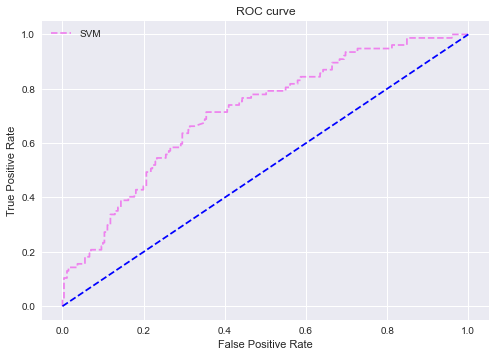

In [368]:
# plot roc curve for SVM model (oversampled data)
plt.style.use('seaborn')


plt.plot(tpr3, fpr3, linestyle='--',color='violet', label='SVM')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/ROC_curve_SVM_BMI30_res.pdf")
plt.show();

In [369]:
#=============================================
# Decision Tree model training (original data)
#=============================================

model_DT = DecisionTreeClassifier(random_state=1)
model_DT.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [370]:
#print out the hyperparameters of the trained model (original data)
model_DT.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1,
 'splitter': 'best'}

In [371]:
# DT model prediction and metrics (original data)

y_pred = model_DT.predict(X_test)

print('DT model metrics:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: \t {0:.2f}'.format(metrics.precision_score(y_test, y_pred)))
print('Recall: \t {0:.2f}'.format(metrics.recall_score(y_test, y_pred)))
print('F1-score: \t {0:.2f}'.format(metrics.f1_score(y_test, y_pred)))

DT model metrics:
Accuracy: 0.71
Precision: 	 0.80
Recall: 	 0.83
F1-score: 	 0.82


In [372]:
# DT model performance with K-folds validation (original data)

from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=10, random_state=1, shuffle=True)
model_DT_1 = DecisionTreeClassifier(random_state=1)
scores1 = cross_val_score(model_DT_1, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
scores2 = cross_val_score(model_DT_1, X, y, scoring='precision', cv=cv, n_jobs=-1)
scores3 = cross_val_score(model_DT_1, X, y, scoring='recall', cv=cv, n_jobs=-1)
scores4 = cross_val_score(model_DT_1, X, y, scoring='f1', cv=cv, n_jobs=-1)
print('Accuracy: %.2f' % (mean(scores1)))
print('Precision: %.2f' % (mean(scores2)))
print('Recall: %.2f' % (mean(scores3)))
print('F1 Score: %.2f' % (mean(scores4)))

Accuracy: 0.71
Precision: 0.81
Recall: 0.82
F1 Score: 0.81


Feature: 0, Score: 0.03414
Feature: 1, Score: 0.03336
Feature: 2, Score: 0.00763
Feature: 3, Score: 0.01525
Feature: 4, Score: 0.02915
Feature: 5, Score: 0.03525
Feature: 6, Score: 0.02093
Feature: 7, Score: 0.03358
Feature: 8, Score: 0.01973
Feature: 9, Score: 0.03316
Feature: 10, Score: 0.01566
Feature: 11, Score: 0.01910
Feature: 12, Score: 0.03281
Feature: 13, Score: 0.03808
Feature: 14, Score: 0.02551
Feature: 15, Score: 0.02910
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.04963
Feature: 18, Score: 0.02151
Feature: 19, Score: 0.03278
Feature: 20, Score: 0.04076
Feature: 21, Score: 0.01790
Feature: 22, Score: 0.03030
Feature: 23, Score: 0.03708
Feature: 24, Score: 0.03035
Feature: 25, Score: 0.01041
Feature: 26, Score: 0.01779
Feature: 27, Score: 0.03329
Feature: 28, Score: 0.02994
Feature: 29, Score: 0.01773
Feature: 30, Score: 0.01925
Feature: 31, Score: 0.03330
Feature: 32, Score: 0.03467
Feature: 33, Score: 0.05508
Feature: 34, Score: 0.01129
Feature: 35, Score: 0.03600
Fe

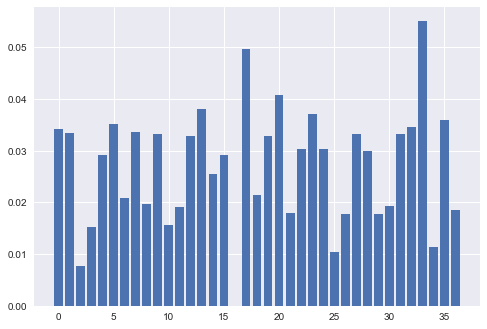

In [373]:
# plot feature important of DT/CART model (original data)
importance = model_DT.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

AxesSubplot(0.125,0.125;0.775x0.755)


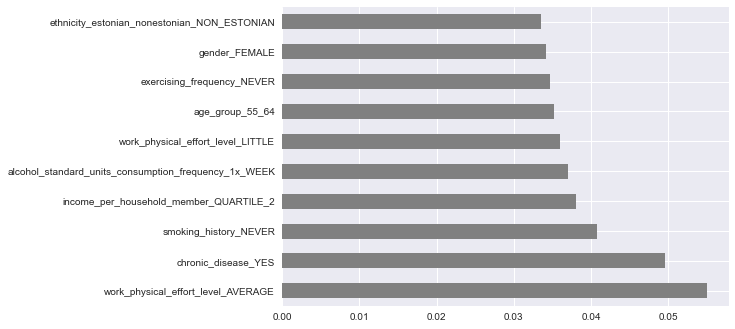

In [374]:
# 10 most important variables affecting BMI≥25.0 in DT model  (original data)

weights = pd.Series(model_DT.feature_importances_, index = X.columns.values)
print(weights.sort_values(ascending=False)[:10].plot(kind='barh', color='grey'))
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/DT_features_most_BMI30.pdf", bbox_inches='tight')

AxesSubplot(0.125,0.125;0.775x0.755)


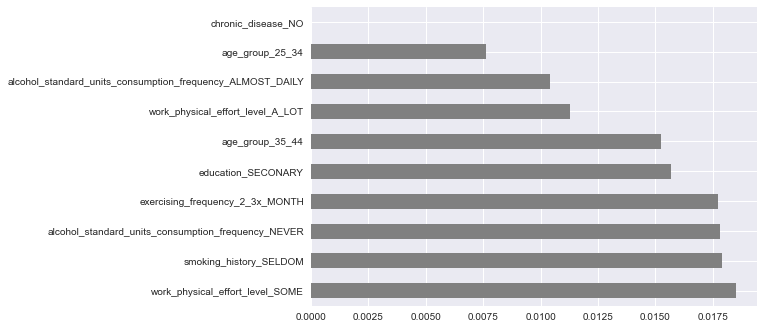

In [375]:
# 10 least important variables affecting BMI≥25.0 in DT model  (original data)
print(weights.sort_values(ascending=False)[-10:].plot(kind='barh', color='grey'))
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/DT_features_least_BMI30.pdf", bbox_inches='tight')

In [376]:
# roc curve for DT model   (original data)

pred_prob4 = model_DT.predict_proba(X_test)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [377]:
# computing auc score for DT   (original data)
auc_score4 = roc_auc_score(y_test, pred_prob4[:,1])
print(auc_score4)

0.5506062203479176


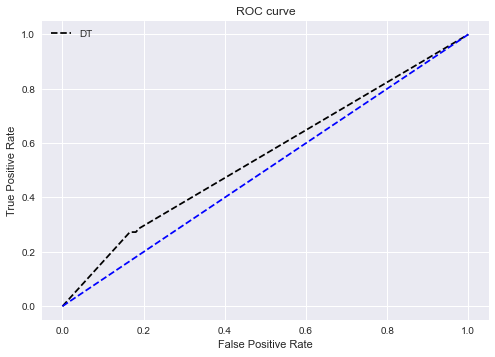

In [378]:
# plot roc curve for DT  (original data)

plt.style.use('seaborn')


plt.plot(tpr4, fpr4, linestyle='--',color='black', label='DT')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/ROC_curve_DT_BMI30.pdf")
plt.show();

In [379]:
#=============================================
# Decision Tree model training (oversampled data)
#=============================================

model_DT_res = DecisionTreeClassifier(random_state=1)
model_DT_res.fit(X_train_res, y_train_res)

DecisionTreeClassifier(random_state=1)

In [380]:
# DT model prediction and metrics (oversampled data)

y_pred = model_DT_res.predict(X_test)

print('DT model metrics:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: \t {0:.2f}'.format(metrics.precision_score(y_test, y_pred)))
print('Recall: \t {0:.2f}'.format(metrics.recall_score(y_test, y_pred)))
print('F1-score: \t {0:.2f}'.format(metrics.f1_score(y_test, y_pred)))

DT model metrics:
Accuracy: 0.70
Precision: 	 0.79
Recall: 	 0.83
F1-score: 	 0.81


In [381]:
# DT model performance with K-folds validation (oversampled data)


#oversamplling the whole dataset (not just training data)
sm_all = SMOTE(random_state=1)
X_res,y_res = sm_all.fit_resample(X,y)

cv = KFold(n_splits=10, random_state=1, shuffle=True)
model_DT_1_res = DecisionTreeClassifier(random_state=1)
scores1 = cross_val_score(model_DT_1_res, X_res, y_res, scoring='accuracy', cv=cv, n_jobs=-1)
scores2 = cross_val_score(model_DT_1_res, X_res, y_res, scoring='precision', cv=cv, n_jobs=-1)
scores3 = cross_val_score(model_DT_1_res, X_res, y_res, scoring='recall', cv=cv, n_jobs=-1)
scores4 = cross_val_score(model_DT_1_res, X_res, y_res, scoring='f1', cv=cv, n_jobs=-1)
scores5 = cross_val_score(model_DT_1_res, X_res, y_res, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Accuracy: %.2f' % (mean(scores1)))
print('Precision: %.2f' % (mean(scores2)))
print('Recall: %.2f' % (mean(scores3)))
print('F1 Score: %.2f' % (mean(scores4)))
print('AUC Score: %.2f' % (mean(scores5)))

Accuracy: 0.78
Precision: 0.78
Recall: 0.79
F1 Score: 0.78
AUC Score: 0.79


AxesSubplot(0.125,0.125;0.775x0.755)


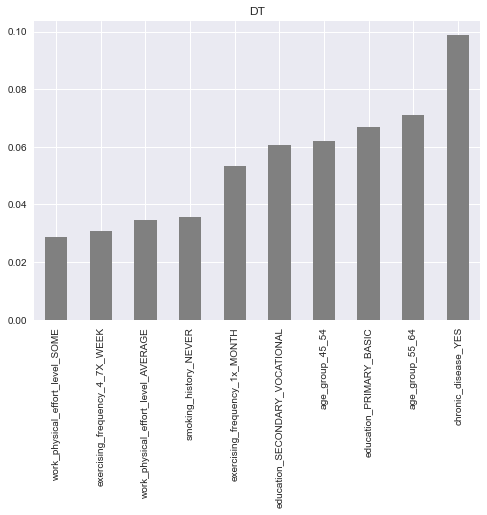

In [382]:
# 10 most important variables affecting BMI≥25.0 in DT model  (oversampled data)

weights = pd.Series(model_DT_res.feature_importances_, index = X.columns.values)
print(weights.sort_values(ascending=True)[-10:].plot(kind='bar', color='grey'))
plt.title('DT')
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/DT_features_most_BMI30_RES.pdf", bbox_inches='tight')

AxesSubplot(0.125,0.125;0.775x0.755)


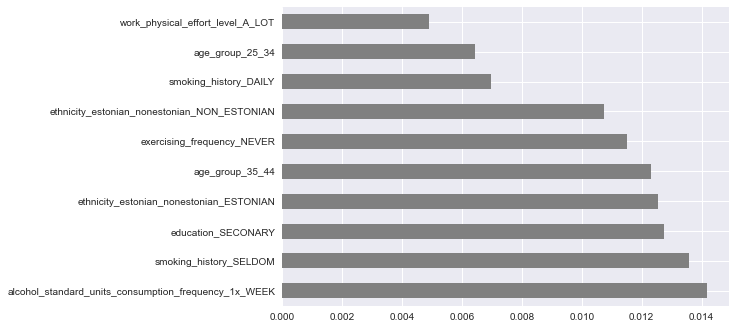

In [383]:
# 10 least important variables affecting BMI≥25.0 in DT model  (oversampled data)
print(weights.sort_values(ascending=False)[-10:].plot(kind='barh', color='grey'))
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/DT_features_least_BMI30.pdf", bbox_inches='tight')

In [384]:
# roc curve for DT model   (oversampled data)

pred_prob4 = model_DT_res.predict_proba(X_test)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [385]:
auc_score4 = roc_auc_score(y_test, pred_prob4[:,1])
print(auc_score4)

0.5283461925528345


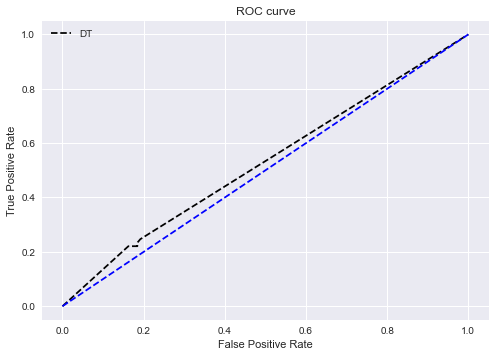

In [386]:
# plot roc curve for DT  (oversampled data)

plt.style.use('seaborn')


plt.plot(tpr4, fpr4, linestyle='--',color='black', label='DT')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/ROC_curve_DT_BMI30_res.pdf")
plt.show();

In [387]:
#====================================================
# Gaussian Naive Bayes model training (original data)
#====================================================

model_NB = GaussianNB()
model_NB.fit(X_train, y_train)

GaussianNB()

In [388]:
#print out the hyperparameters of the trained model (original data)
model_NB.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [389]:
# NB model prediction and metrics (original data)

y_pred = model_NB.predict(X_test)

print('NB model metrics:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: \t {0:.2f}'.format(metrics.precision_score(y_test, y_pred)))
print('Recall: \t {0:.2f}'.format(metrics.recall_score(y_test, y_pred)))
print('F1-score: \t {0:.2f}'.format(metrics.f1_score(y_test, y_pred)))

NB model metrics:
Accuracy: 0.74
Precision: 	 0.86
Recall: 	 0.80
F1-score: 	 0.83


In [390]:
# DT model performance with K-folds validation (original data)

from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=10, random_state=1, shuffle=True)
model_NB_1 = GaussianNB()
scores1 = cross_val_score(model_NB_1, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
scores2 = cross_val_score(model_NB_1, X, y, scoring='precision', cv=cv, n_jobs=-1)
scores3 = cross_val_score(model_NB_1, X, y, scoring='recall', cv=cv, n_jobs=-1)
scores4 = cross_val_score(model_NB_1, X, y, scoring='f1', cv=cv, n_jobs=-1)
print('Accuracy: %.2f' % (mean(scores1)))
print('Precision: %.2f' % (mean(scores2)))
print('Recall: %.2f' % (mean(scores3)))
print('F1 Score: %.2f' % (mean(scores4)))

Accuracy: 0.71
Precision: 0.84
Recall: 0.78
F1 Score: 0.81


In [391]:
# plot feature important of NB model (original data)

from sklearn.inspection import permutation_importance

imps = permutation_importance(model_NB, X_test, y_test)
importances = imps.importances_mean
std = imps.importances_std
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_test.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))

Feature ranking:
1. exercising_frequency_NEVER (0.031034)
2. age_group_25_34 (0.015517)
3. education_SECONDARY_VOCATIONAL (0.008046)
4. age_group_55_64 (0.008046)
5. income_per_household_member_QUARTILE_1 (0.006897)
6. education_HIGHER (0.006897)
7. work_physical_effort_level_SOME (0.005172)
8. alcohol_standard_units_consumption_frequency_1+x_MONTH (0.002874)
9. work_physical_effort_level_LITTLE (0.002299)
10. age_group_35_44 (0.002299)
11. income_per_household_member_QUARTILE_4 (0.001724)
12. alcohol_standard_units_consumption_frequency_1x_WEEK (0.001724)
13. age_group_45_54 (0.001149)
14. alcohol_standard_units_consumption_frequency_<1x_MONTH (0.001149)
15. smoking_history_SELDOM (0.001149)
16. exercising_frequency_2_3x_WEEK (0.000575)
17. education_PRIMARY_BASIC (0.000575)
18. gender_MALE (0.000575)
19. gender_FEMALE (0.000575)
20. education_SECONARY (0.000000)
21. income_per_household_member_QUARTILE_2 (0.000000)
22. exercising_frequency_4_7X_WEEK (-0.000575)
23. chronic_disease_YE

AxesSubplot(0.125,0.125;0.775x0.755)


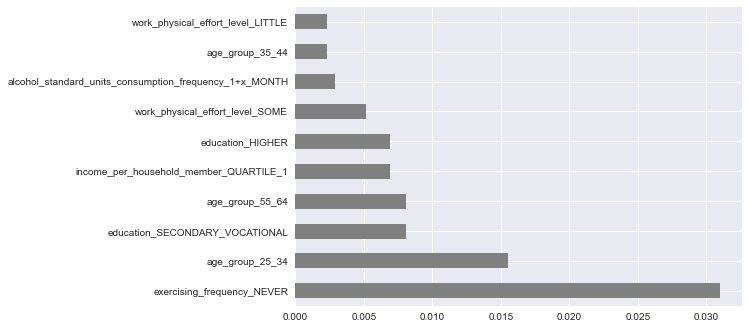

In [392]:
# greatest impact / NB model  (original data)

weights = pd.Series(importances, index = X.columns.values)
print(weights.sort_values(ascending=False)[:10].plot(kind='barh', color='grey'))
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/NB_features_most_BMI30.pdf", bbox_inches='tight')


AxesSubplot(0.125,0.125;0.775x0.755)


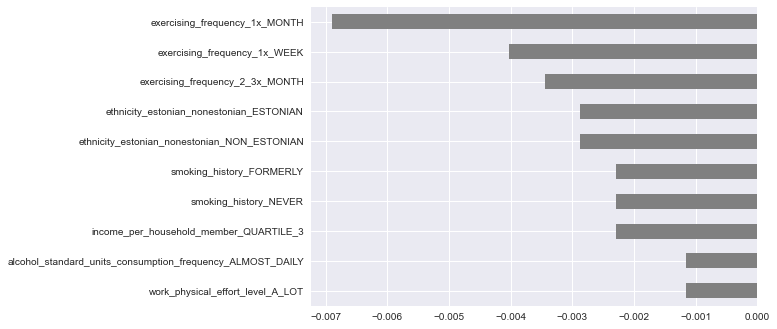

In [393]:
# least impact / NB model  (original data)
print(weights.sort_values(ascending=False)[-10:].plot(kind='barh', color='grey'))
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/NB_features_least_BMI30.pdf", bbox_inches='tight')

In [394]:
# roc curve for NB model  (original data)

pred_prob5 = model_NB.predict_proba(X_test)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [395]:
# computing auc score for NB  (original data)
auc_score5 = roc_auc_score(y_test, pred_prob5[:,1])
print(auc_score5)

0.7389179086596062


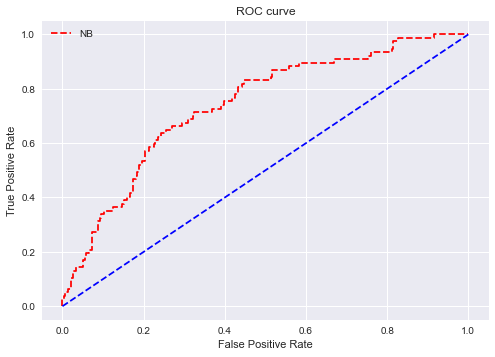

In [396]:
# plot roc curves for NB  (original data)

plt.style.use('seaborn')

plt.plot(tpr5, fpr5, linestyle='--',color='red', label='NB')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/ROC_curve_NB_BMI30.pdf")
plt.show();

In [397]:
#====================================================
# Gaussian Naive Bayes model training (oversampled data)
#====================================================

model_NB_res = GaussianNB()
model_NB_res.fit(X_train_res, y_train_res)

GaussianNB()

In [398]:
# NB model prediction and metrics (oversampled data)

y_pred = model_NB_res.predict(X_test)

print('NB model metrics:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: \t {0:.2f}'.format(metrics.precision_score(y_test, y_pred)))
print('Recall: \t {0:.2f}'.format(metrics.recall_score(y_test, y_pred)))
print('F1-score: \t {0:.2f}'.format(metrics.f1_score(y_test, y_pred)))

NB model metrics:
Accuracy: 0.67
Precision: 	 0.86
Recall: 	 0.69
F1-score: 	 0.77


In [399]:
# DT model performance with K-folds validation (oversampled data)


#oversamplling the whole dataset (not just training data)
sm_all = SMOTE(random_state=1)
X_res,y_res = sm_all.fit_resample(X,y)

cv = KFold(n_splits=10, random_state=1, shuffle=True)
model_NB_1_res = GaussianNB()
scores1 = cross_val_score(model_NB_1_res, X_res, y_res, scoring='accuracy', cv=cv, n_jobs=-1)
scores2 = cross_val_score(model_NB_1_res, X_res, y_res, scoring='precision', cv=cv, n_jobs=-1)
scores3 = cross_val_score(model_NB_1_res, X_res, y_res, scoring='recall', cv=cv, n_jobs=-1)
scores4 = cross_val_score(model_NB_1_res, X_res, y_res, scoring='f1', cv=cv, n_jobs=-1)
scores5 = cross_val_score(model_NB_1_res, X_res, y_res, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Accuracy: %.2f' % (mean(scores1)))
print('Precision: %.2f' % (mean(scores2)))
print('Recall: %.2f' % (mean(scores3)))
print('F1 Score: %.2f' % (mean(scores4)))
print('AUC Score: %.2f' % (mean(scores5)))

Accuracy: 0.67
Precision: 0.67
Recall: 0.69
F1 Score: 0.68
AUC Score: 0.73


AxesSubplot(0.125,0.125;0.775x0.755)


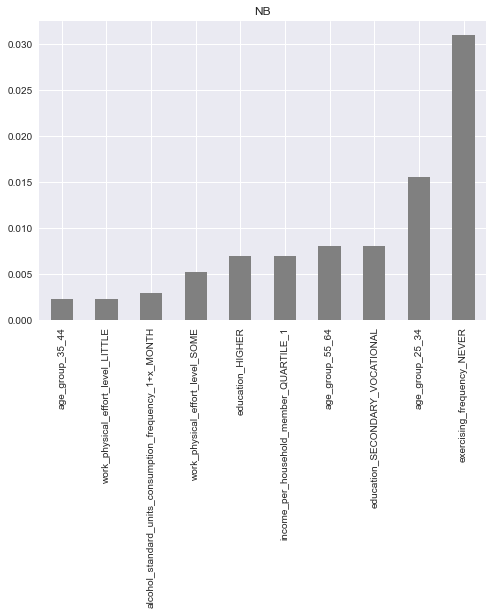

In [400]:
# greatest impact / NB model  (oversampled  data)

weights = pd.Series(importances, index = X.columns.values)
print(weights.sort_values(ascending=True)[-10:].plot(kind='bar', color='grey'))
plt.title('NB')
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/NB_features_most_BMI30_RES.pdf", bbox_inches='tight')

AxesSubplot(0.125,0.125;0.775x0.755)


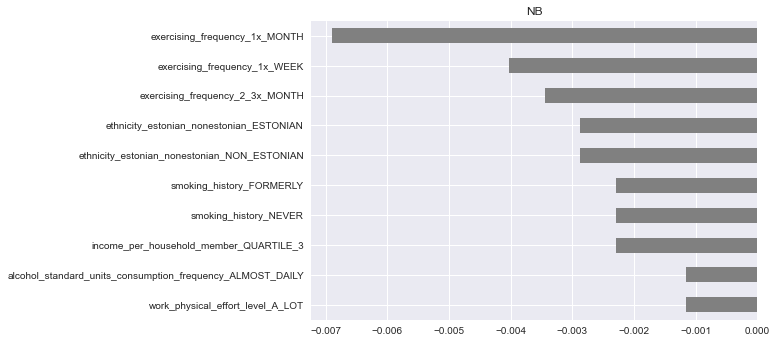

In [401]:
# least impact / NB model  (oversampled data)
print(weights.sort_values(ascending=False)[-10:].plot(kind='barh', color='grey'))
plt.title('NB')
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/NB_features_least_BMI30_res.pdf", bbox_inches='tight')

In [402]:
# roc curve for NB model  (oversampled data)

pred_prob5 = model_NB_res.predict_proba(X_test)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [403]:
# computing auc score for NB  (oversampled data)
auc_score5 = roc_auc_score(y_test, pred_prob5[:,1])
print(auc_score5)

0.7184070542004121


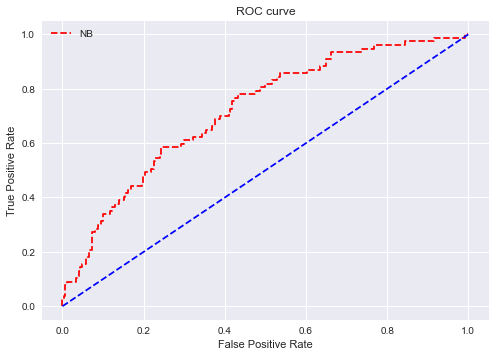

In [404]:
# plot roc curves for NB  (oversampled data)

plt.style.use('seaborn')

plt.plot(tpr5, fpr5, linestyle='--',color='red', label='NB')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/ROC_curve_NB_BMI30_res.pdf")
plt.show();

In [418]:
#====================================
# KNN model training (original data)
#====================================

# testing accuracy for k from 1 to 40
k_range = range(1,41)
scores={}
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))

Text(0, 0.5, 'Testing accuracy')

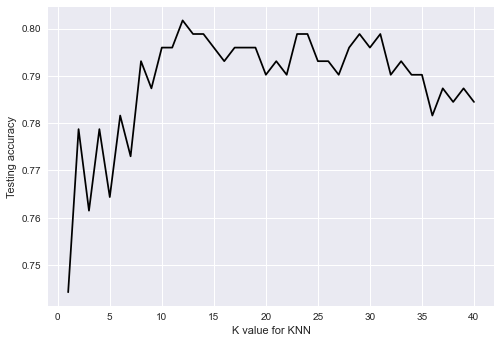

In [419]:
#plotting the relationship between k values and correspondgin testing accuracy (original data)

plt.plot(k_range,scores_list, color='black')
plt.xlabel('K value for KNN')
plt.ylabel('Testing accuracy')

In [421]:
# the final model should have k=13 (original data)
model_KNN = KNeighborsClassifier(n_neighbors=13)
model_KNN.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=13)

In [422]:
#print out the hyperparameters of the trained model (original data)
model_KNN.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 13,
 'p': 2,
 'weights': 'uniform'}

In [423]:
# KNN model prediction and metrics (original data)

y_pred = model_KNN.predict(X_test)

print('KNN model metrics:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: \t {0:.2f}'.format(metrics.precision_score(y_test, y_pred)))
print('Recall: \t {0:.2f}'.format(metrics.recall_score(y_test, y_pred)))
print('F1-score: \t {0:.2f}'.format(metrics.f1_score(y_test, y_pred)))

KNN model metrics:
Accuracy: 0.80
Precision: 	 0.80
Recall: 	 0.99
F1-score: 	 0.88


In [424]:
# DT model performance with K-folds validation (original data)

from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=10, random_state=1, shuffle=True)
model_KNN_1 = KNeighborsClassifier()
scores1 = cross_val_score(model_KNN_1, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
scores2 = cross_val_score(model_KNN_1, X, y, scoring='precision', cv=cv, n_jobs=-1)
scores3 = cross_val_score(model_KNN_1, X, y, scoring='recall', cv=cv, n_jobs=-1)
scores4 = cross_val_score(model_KNN_1, X, y, scoring='f1', cv=cv, n_jobs=-1)
print('Accuracy: %.2f' % (mean(scores1)))
print('Precision: %.2f' % (mean(scores2)))
print('Recall: %.2f' % (mean(scores3)))
print('F1 Score: %.2f' % (mean(scores4)))

Accuracy: 0.76
Precision: 0.80
Recall: 0.92
F1 Score: 0.86


In [425]:
# feature importance is not defined for the KNN classification algorithm and there is no easy way to calucate it

In [426]:
# roc curve for KNN model (original data)

pred_prob6 = model_KNN.predict_proba(X_test)
fpr6, tpr6, thresh6 = roc_curve(y_test, pred_prob6[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [427]:
# computing auc score for KNN (original data)
auc_score6 = roc_auc_score(y_test, pred_prob6[:,1])
print(auc_score6)

0.6382326160923947


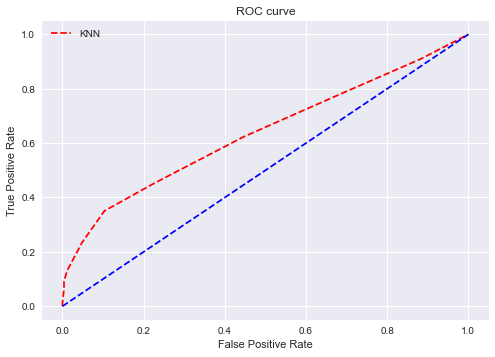

In [428]:
# plot roc curve (original data)

plt.style.use('seaborn')


plt.plot(tpr6, fpr6, linestyle='--',color='red', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/ROC_curve_KNN_BMI30.pdf")
plt.show();

In [429]:
#====================================
# KNN model training (oversampled data)
#====================================

# testing accuracy for k from 1 to 40
k_range = range(1,41)
scores={}
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_res,y_train_res)
    y_pred = knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))

Text(0, 0.5, 'Testing accuracy')

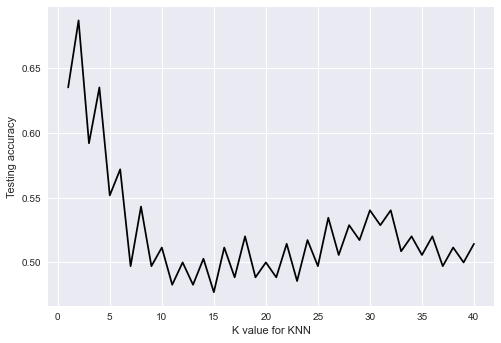

In [442]:
#plotting the relationship between k values and correspondgin testing accuracy (oversampled data)

plt.plot(k_range,scores_list, color='black')
plt.xlabel('K value for KNN')
plt.ylabel('Testing accuracy')

In [443]:
# the final model should have k=3, as the odd number beyond 1 with highes testing accuracy (oversampled data)
model_KNN_res = KNeighborsClassifier(n_neighbors=3)
model_KNN_res.fit(X_train_res, y_train_res)


KNeighborsClassifier(n_neighbors=3)

In [444]:
# KNN model prediction and metrics (oversampled data)

y_pred = model_KNN_res.predict(X_test)

print('KNN model metrics:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: \t {0:.2f}'.format(metrics.precision_score(y_test, y_pred)))
print('Recall: \t {0:.2f}'.format(metrics.recall_score(y_test, y_pred)))
print('F1-score: \t {0:.2f}'.format(metrics.f1_score(y_test, y_pred)))

KNN model metrics:
Accuracy: 0.59
Precision: 	 0.86
Recall: 	 0.57
F1-score: 	 0.69


In [445]:
# KNN model performance with K-folds validation (oversampled data)


#oversampling the whole dataset (not just training data)
sm_all = SMOTE(random_state=1)
X_res,y_res = sm_all.fit_resample(X,y)

cv = KFold(n_splits=10, random_state=1, shuffle=True)
model_KNN_1_res = KNeighborsClassifier(n_neighbors=3)
scores1 = cross_val_score(model_KNN_1_res, X_res, y_res, scoring='accuracy', cv=cv, n_jobs=-1)
scores2 = cross_val_score(model_KNN_1_res, X_res, y_res, scoring='precision', cv=cv, n_jobs=-1)
scores3 = cross_val_score(model_KNN_1_res, X_res, y_res, scoring='recall', cv=cv, n_jobs=-1)
scores4 = cross_val_score(model_KNN_1_res, X_res, y_res, scoring='f1', cv=cv, n_jobs=-1)
scores5 = cross_val_score(model_KNN_1_res, X_res, y_res, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Accuracy: %.2f' % (mean(scores1)))
print('Precision: %.2f' % (mean(scores2)))
print('Recall: %.2f' % (mean(scores3)))
print('F1 Score: %.2f' % (mean(scores4)))
print('AUC Score: %.2f' % (mean(scores5)))

Accuracy: 0.76
Precision: 0.93
Recall: 0.57
F1 Score: 0.71
AUC Score: 0.85


In [446]:
# roc curve for KNN model (oversampled data)

pred_prob6 = model_KNN_res.predict_proba(X_test)
fpr6, tpr6, thresh6 = roc_curve(y_test, pred_prob6[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [447]:
auc_score6 = roc_auc_score(y_test, pred_prob6[:,1])
print(auc_score6)

0.6578089806872095


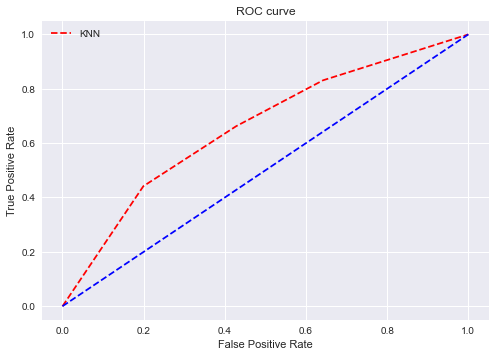

In [448]:
# plot roc curve (original data)

plt.style.use('seaborn')


plt.plot(tpr6, fpr6, linestyle='--',color='red', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/ROC_curve_KNN_BMI30_res.pdf")
plt.show();

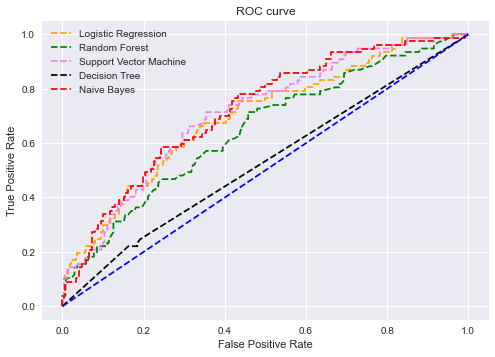

In [449]:
# a plot of roc curves of all 5 models (oversampled data)
plt.style.use('seaborn')

# plot roc curves
plt.plot(tpr1, fpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(tpr2, fpr2, linestyle='--',color='green', label='Random Forest')
plt.plot(tpr3, fpr3, linestyle='--',color='violet', label='Support Vector Machine')
plt.plot(tpr4, fpr4, linestyle='--',color='black', label='Decision Tree')
plt.plot(tpr5, fpr5, linestyle='--',color='red', label='Naive Bayes')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/ROC_curve_all5_BMI30_res.pdf")
plt.show();

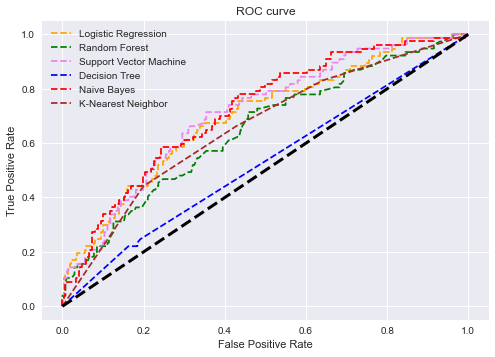

In [440]:
# a plot of roc curves of all 6 models (oversampled data)
plt.style.use('seaborn')

# plot roc curves
plt.plot(tpr1, fpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(tpr2, fpr2, linestyle='--',color='green', label='Random Forest')
plt.plot(tpr3, fpr3, linestyle='--',color='violet', label='Support Vector Machine')
plt.plot(tpr4, fpr4, linestyle='--',color='blue', label='Decision Tree')
plt.plot(tpr5, fpr5, linestyle='--',color='red', label='Naive Bayes')
plt.plot(tpr6, fpr6, linestyle='--',color='brown', label='K-Nearest Neighbor')

plt.plot(p_fpr, p_tpr, linestyle='--', color='black', linewidth=3)
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/ROC_curve_all6_BMI30_res.pdf")
plt.show();

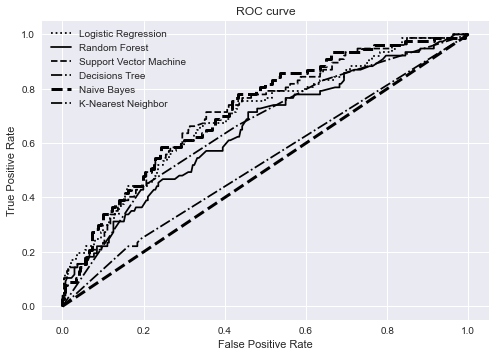

In [441]:
# a plot of roc curves of all 6 models / black and white
plt.style.use('seaborn')

# plot roc curves
plt.plot(tpr1, fpr1, linestyle=':',color = 'black',label='Logistic Regression')
plt.plot(tpr2, fpr2, linestyle='-',color='black', label='Random Forest')
plt.plot(tpr3, fpr3, linestyle='--',color='black', label='Support Vector Machine')
plt.plot(tpr4, fpr4, linestyle='-.',color='black', label='Decisions Tree')
plt.plot(tpr5, fpr5, linestyle='--',color='black', linewidth=3, label='Naive Bayes')
plt.plot(tpr6, fpr6, linestyle='-.',color='black', label='K-Nearest Neighbor')

plt.plot(p_fpr, p_tpr, linestyle='--', color='black', linewidth=3)
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/ROC_curve_all6_BW_BMI30_res.pdf")
plt.show();